In [3]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

<ipython-input-3-e23ecb89d3de>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


In [4]:
# Visualization setup
%matplotlib
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.ion() # enable the interactive mode

import seaborn as sns
sns.set()  # set plot styles

Using matplotlib backend: Qt5Agg


In [5]:
df['CO(GT)'].plot()

<AxesSubplot:xlabel='Datetime'>

In [6]:
#linear interpolation
co = df['CO(GT)'].copy()
co.interpolate(inplace=True)

In [7]:
#visualize original and imputed data
plt.plot(df['CO(GT)'], label = 'original',zorder=2)
#plt.plot(co, label = 'liner interpolation', zoder=1)
plt.legend(loc = 'best')

In [8]:
#detecting outliers using boxplot
plt.boxplot(co)
plt.title('detecting outliers using boxplot')
#plt.xlable('CO(GT)')

Text(0.5, 1.0, 'detecting outliers using boxplot')

In [9]:
#Calculate correlations between variables
corr_matrix = df.corr()
print(corr_matrix)

                 CO(GT)  PT08.S1(CO)  PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)  \
CO(GT)         1.000000     0.877203       0.914973  0.792557     -0.701703   
PT08.S1(CO)    0.877203     1.000000       0.892964  0.713654     -0.771938   
PT08.S2(NMHC)  0.914973     0.892964       1.000000  0.704435     -0.796703   
NOx(GT)        0.792557     0.713654       0.704435  1.000000     -0.655707   
PT08.S3(NOx)  -0.701703    -0.771938      -0.796703 -0.655707      1.000000   
NO2(GT)        0.679262     0.641529       0.646245  0.763111     -0.652083   
PT08.S4(NO2)   0.639470     0.682881       0.777254  0.233731     -0.538468   
PT08.S5(O3)    0.851403     0.899324       0.880578  0.787046     -0.796569   
RH             0.040218     0.114606      -0.090380  0.221032     -0.056740   
AH             0.065809     0.135324       0.186933 -0.149323     -0.232017   
C6H6(GT)       0.845144     0.883795       0.981950  0.626638     -0.735744   

                NO2(GT)  PT08.S4(NO2)  PT08.S5(O3) 

In [10]:
#Choose the least correlated variable 
rh = df['RH'].copy().interpolate() #RH(relative humidity)


In [11]:
#visualize a scatter plot(CO, RH)
plt.scatter(co, rh, s=12, c='black')
plt.xlable('CO(GT)')
plt.ylable('RH')

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

In [12]:
#choose the most correlated variable
nmhc = df['PT08.S2(NMHC)'].copy().interpolate() 

In [13]:
plt.scatter(co, nmhc, s=12, c='black')

In [14]:
"""
IQR-based Outlier Detection
"""

#Q1,Q2,Q3
q1 = co.quantile(0.25)
median = co.quantile(0.5) #q2
q3 = co.quantile(0.75)
print(q1,median, q3)

1.1 1.8 2.9


In [15]:
#IQR, upper_fense, lower_fence
iqr = q3-q1
upper_fence = q3 +1.5*iqr
lower_fence = q1 -1.5*iqr
print(upper_fence, lower_fence)

5.6 -1.5999999999999996


In [16]:
#filtering the outliers
outliers = co.loc[(co> upper_fence)|(co<lower_fence)]
outliers

Datetime
2004-03-11 19:00:00    6.9
2004-03-11 20:00:00    6.1
2004-03-12 20:00:00    6.6
2004-03-14 20:00:00    5.9
2004-03-15 09:00:00    8.1
                      ... 
2005-03-23 19:00:00    6.2
2005-03-23 20:00:00    7.2
2005-03-24 19:00:00    5.9
2005-03-24 20:00:00    7.5
2005-03-25 19:00:00    5.7
Name: CO(GT), Length: 224, dtype: float64

In [17]:
#mask for outliers
mask = co.index.isin(outliers.index)
mask

array([False, False, False, ..., False, False, False])

In [19]:
plt.plot(co[~mask],label='normal', color ='blue',
        marker='o', markersize =3, linestyle= 'None')
#plt.plot(outliers,labee = 'outliers', color = 'red',
#        marker='x',markersize =3,linestyle ='None')

In [20]:
#removing the outliers 
co_refined = co.copy()
co_refined[mask]= np.nan
print(co_refined[mask])
co_refined.plot()


Datetime
2004-03-11 19:00:00   NaN
2004-03-11 20:00:00   NaN
2004-03-12 20:00:00   NaN
2004-03-14 20:00:00   NaN
2004-03-15 09:00:00   NaN
                       ..
2005-03-23 19:00:00   NaN
2005-03-23 20:00:00   NaN
2005-03-24 19:00:00   NaN
2005-03-24 20:00:00   NaN
2005-03-25 19:00:00   NaN
Name: CO(GT), Length: 224, dtype: float64


<AxesSubplot:xlabel='Datetime'>

In [21]:
#linear interplotion for reconstructing outliers
co_refined.interpolate(inplace=True)
co_refined.plot()

<AxesSubplot:xlabel='Datetime'>

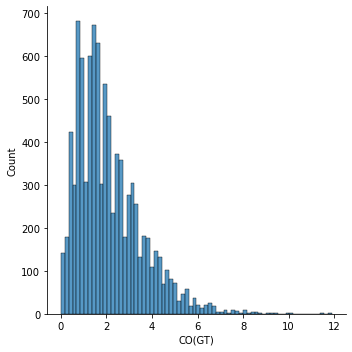

In [33]:
"""
detecting outliers with z-scores
"""
#z-scores based method
import seaborn as sns
sns.displot(co)

In [34]:
#mean,standard deciation
mean = np.mean(co)
std = np.std(co)
print(mean, std)

2.126146200705357 1.4369815748596482


In [35]:
#calculate Z-score for each data points
outliers =[]
thers = 3 #Z-score thershold

for i in co:
    z_score = (i - mean )/ std
    if (np.abs(z_score) > thers):
        print(z_score)
        outliers.append(i)

3.3221398818289734
3.113368937755246
4.157223658123882
4.087633343432639
3.0437786230640036
3.113368937755246
3.8092720846676698
3.182959252446488
3.113368937755246
3.600501140593942
3.5309108259027
3.0437786230640036
3.0437786230640036
3.182959252446488
3.0437786230640036
3.600501140593942
3.182959252446488
3.7396817699764275
3.0437786230640036
3.182959252446488
3.3917301965202156
4.087633343432639
3.878862399358912
3.2525495671377302
4.36599460219761
3.2525495671377302
4.018043028741397
4.36599460219761
4.087633343432639
4.36599460219761
5.131488063801275
3.0437786230640036
3.113368937755246
3.7396817699764275
3.2525495671377302
4.018043028741397
4.087633343432639
4.922717119727547
3.3917301965202156
3.786075313103922
4.180420429687629
4.574765546271336
4.157223658123882
4.087633343432639
3.113368937755246
3.2525495671377302
3.9484527140501537
5.618620266639971
3.113368937755246
3.7396817699764275
3.5309108259027
4.296404287506367
4.505175231580093
3.3221398818289734
3.04377862306400

In [41]:
#simplified version of filtering outliers
outliers =co.loc[np.abs((co - mean)/std) > 3].copy()

In [42]:
#mask for outliers
mask = co.index.isin(outliers.index)

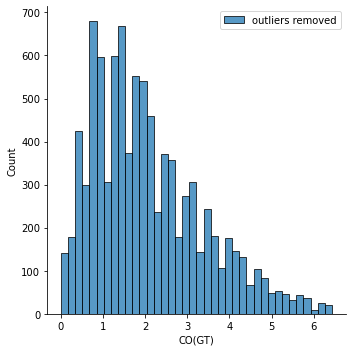

In [45]:
#comparsion of distribution before/after outlier removal
#sns.displot(co, axlabel = 'CO(GT)',label='original')
sns.displot(co[~mask], label= 'outliers removed')
plt.legend(loc = 'best')

#[exer] adjust thres

In [1]:
#flooring and capping
#floor = co.quantile(0,1)
#cap = co.quantile(0,9)


In [2]:
#visualize the result
#co.loc[co< floor] = floor
#co.loc[co> cap] =cap

<AxesSubplot:xlabel='Datetime'>

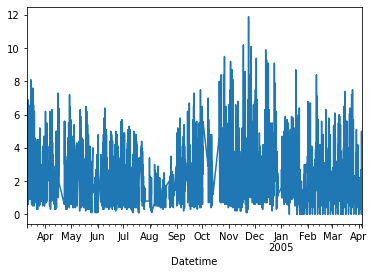

In [52]:
co.plot()